<h2>주제: <strong>최근 15년 지역별 아파트 실거래가와 지가변동률의 상관관계 분석</strong></h2>

<strong><h3>1. 주제 선정 이유</h3></strong>
최근 수도권 지역에서만 급격하게 아파트 거래가격이 상승했다.
아파트 실거래가를 결정하는데는 토지가치, 교통 접근성, 편의시설, 교육환경, 환경가치 등 여러 가지 요인들이 존재한다.<br>
수도권 지역은 대부분 토지가치 외적 요소들에서 비수도권  지역보다 유리하다.<br>
교육 인프라가 발전되어 있고, 교통 접근성, 다양한 문화생활들이 밀집되어있기에, 토지 자체의 가치가 반영되는 정도가 다를 것이라 생각했다.<br>




<strong><h3>2. 가설 정의</h3></strong>
토지 가치는 지가변동률(FLP, Fluctuation rate of Land Price)을 통해 나타나며, 아파트 매매 실거래(Transaction Cost)가 데이터는 '집값'을 의미한다.<br>
토지의 가치를 나타내는 지가변동률과 아파트 실거래가를 비교함으로써 토지 가치와 아파트 실거래가 사이의 상관관계를 분석하고자 한다.

<strong>가설</strong><br>토지 가치를 제외한 다양한 요소들이 아파트 실거래가에 미치는 영향은 수도권에서 더 클 것이다.<br>
즉, 수도권 지역은 지가변동률과 실거래가 사이의 상관관계가 약할 것이며,<br>
비수도권 지역은 지가변동률과 실거래가 더 높은 상관관계가 존재할 것이다.<br>

<strong><h3>3. 데이터 획득 계획</h3><br></strong>1. 한국 부동산원 부동산통계정보시스템의 공개자료실 정보</strong><br>(https://www.reb.or.kr/r-one/main.do)<br>
<h5>"지가변동률_연도별.csv"파일 분석<br> "아파트_매매_실거래가.csv"파일 분석<h5>


<strong><h3>4. 분석을 위한 데이터의 가공</h3></strong>

<ul>
    <li>
    목표로 하는 기간인 2006년 ~ 2021년 중, 2006년 부터 2012년까지의 수도권과 비수도권의 평균 지가변동 지표가 따로 계산되어 있지 않아, 해당 년도의  지가변동률 데이터를의 평균을 계산한다.
    </li>
    <li>
    해당 기간 내의 지가변동률과 아파트 매매 실거래가를 수도권과 비수도권으로 나누어 데이터프레임 형태로 가공한다.
    </li>
    <li>
    회귀분석 및 시각화
    </li>
</ul>

<strong><h3>5. 분석 결과 도출</h3></strong>
지가변동률과 아파트 매매 실거래가의 상관관계를 분석하기 위해, 단순선형회기분석을 진행하였다.<br>
R squared 가 0.4 이상이면 유의미한 통계라 판단하고,
prob(F-statistics)가 0.05 이하면 굉장히 유의미한 상관관계라 판단한다.

<strong><h3>6. 결론</h3></strong>
수도권 지역에서는 지가변동률과 아파트 매매 실거래가 사이의 낮은 상관관계를 지닌다.<br><br>수도권 지역: R squared: 0.1987 Prob(F-statistics): 0.0836<br>상관관계가 크지 않은 것으로 나타났다.<br><br>
비수도권 지역: R squared: 0.3102 Prob(F-statistics): 0.025<br>
반면, 비수도권 지역에서는 수도권보다 높은 상관관계를 지닌다.<br>
<br>
R squared 지수와 F-statistics 지수 분석 결과, 완벽한 인과관계를 지니지는 않았다. 그러나, 실거래에 미치는 요소들 중 지가를 제외한 요소들의 영향력이 존재하기에 유의미한 관계라 결론한다.<br>
비수도권 지역은 지가가 아파트 실거래가에 더 많은 영향을 미치고, 수도권 지역은 지가 외적인 요소들의 영향을 비교적 더 많이 받는다는 결론이 도출 가능하다.

<strong><h3>7. 참고문헌</h3></strong>

<ul>
    <li>W3Schoold Matplotlib Tutorial(https://www.w3schools.com/python/matplotlib_pyplot.asp)</li>
    <li>Github E book- Pandas Tutorial(https://github.com/virtualramblas/learn-pandas-ebook-notebooks)</li>
    <li>김영우. 'Do it! 쉽게 배우는 파이썬 데이터 분석' 이지스퍼블리싱,2022</li>
    <li>부동산통계정보 산정 과정 참고(https://www.reb.or.kr/r-one/cm/cntnts/cntntsView.do?mi=9453&cntntsId=1027)</li>
</ul>

In [1]:
import pandas as pd
df= pd.read_csv('지가변동률_연도별.csv',encoding='cp949')
df=df.loc[:454]


In [2]:
# 2006년~2021년 지가변동률 지표의 평균 데이터 부재 => 수도권 지가변동률 평균 구하기

def calculate_average_capital_area(x):
    target=str(x)+'년'
    target_data= df[f'{target}']
    target_list=[]
    for x in target_data[6:33]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[79:92]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[92:98]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[130:206]:
        if x != '-':
            target_list.append(float(x))

    result=(sum(target_list)/len(target_list))
    result=round(result,2)
    return(result)

In [3]:
# 2006년~2021년 지가변동률 지표의 평균 데이터 부재 => 비수도권 지가변동률 평균 구하기
def calculate_average_non_capital_area(x):
    target=str(x)+'년'
    target_data= df[f'{target}']
    target_list=[]
    for x in target_data[50:63]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[63:72]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[72:80]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[109:116]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[116:122]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[122:128]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[128]: #이거 다시 한번 체그해보기
        if x != '-':
            target_list.append(float(x))
    for x in target_data[208:233]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[235:258]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[258:294]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[296:320]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[322:353]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[355:395]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[397:446]:
        if x != '-':
            target_list.append(float(x))
    for x in target_data[448:453]:
        if x != '-':
            target_list.append(float(x))
    
    result=(sum(target_list)/len(target_list))
    result=round(result,2)
    return(result)

In [4]:
#데이터 프레임의 값을 수정하기
for x in range(2006,2012):
    target=str(x)+'년'
    df.at[1,target]= calculate_average_capital_area(x)
    df.at[2,target]= calculate_average_non_capital_area(x)

In [5]:
#데이터 가공
capital_series=df.loc[1][34:]
none_capital_series=df.loc[2][34:]

capital_df=pd.DataFrame(capital_series)
capital_df = capital_df.rename({1:'FLP'},axis=1)

none_capital_df=pd.DataFrame(none_capital_series)
none_capital_df = none_capital_df.rename({2:'FLP'},axis=1)

#df number 타입 오류 해결
capital_df['FLP']=capital_df['FLP'].astype(float)
none_capital_df['FLP']=none_capital_df['FLP'].astype(float)

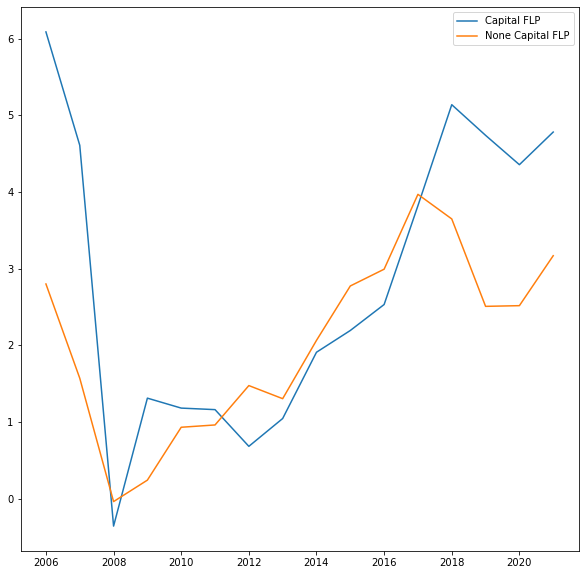

In [6]:
#지가 변동률 시각화
import matplotlib.pyplot as plt

year=[]
for i in range(2006,2022):
    year.append(i)

plt.figure(figsize=(10,10))
plt.plot(year, capital_df, label='Capital FLP')
plt.plot(year, none_capital_df, label='None Capital FLP')
plt.legend()

아파트 실거래가 분석 시작

In [7]:
# 수도권과 지방 평규 실거래가 값 가져오기
import pandas as pd

df_transaction_cost= pd.read_csv('아파트_매매_실거래_평균가격_20221114140700.csv',encoding='cp949')

capital_transaction_cost= df_transaction_cost.loc[1]
capital_transaction_cost= capital_transaction_cost[2:]

none_capital_transaction_cost= df_transaction_cost.loc[2]
none_capital_transaction_cost= none_capital_transaction_cost[2:]

In [8]:
#2006년 ~ 2021년 연도별 수도권 실거래가 평균 도출
def transaction_calculate_average_capital():
    data= capital_transaction_cost[:192]
    for i in range(1,17):
        target=data[(i-1)*12:i*12]
        target= list(map(float,target))
        
        insert_date= str(i + 2005)+'년'
        insert_data=[{'Transaction_Cost':round((sum(target)/len(target)), 2)}]
        if i==1:
            transaciton_df=pd.DataFrame(insert_data, index=[insert_date], columns=['Transaction_Cost'])
        else:
            transaciton_df.loc[insert_date]=round((sum(target)/len(target)),2)
            
    return(transaciton_df)

In [9]:
#2006년 ~ 2021년 연도별 비수도권 실거래가 평균 도출
def transaction_calculate_average_none_capital():
    data= none_capital_transaction_cost[:192]
    for i in range(1,17):
        target=data[(i-1)*12:i*12]
        target= list(map(float,target))
        
        insert_date= str(i + 2005)+'년'
        insert_data=[{'Transaction_Cost':round((sum(target)/len(target)), 2)}]
        if i==1:
            transaciton_df=pd.DataFrame(insert_data, index=[insert_date], columns=['Transaction_Cost'])
        else:
            transaciton_df.loc[insert_date]=round((sum(target)/len(target)),2)
            
    return(transaciton_df)

In [10]:
df_capital_transaction_cost=transaction_calculate_average_capital()
df_none_capital_transaction_cost=transaction_calculate_average_none_capital()
df_capital_transaction_cost['Transaction_Cost']=df_capital_transaction_cost['Transaction_Cost'].astype(float)
df_none_capital_transaction_cost['Transaction_Cost']=df_none_capital_transaction_cost['Transaction_Cost'].astype(float)

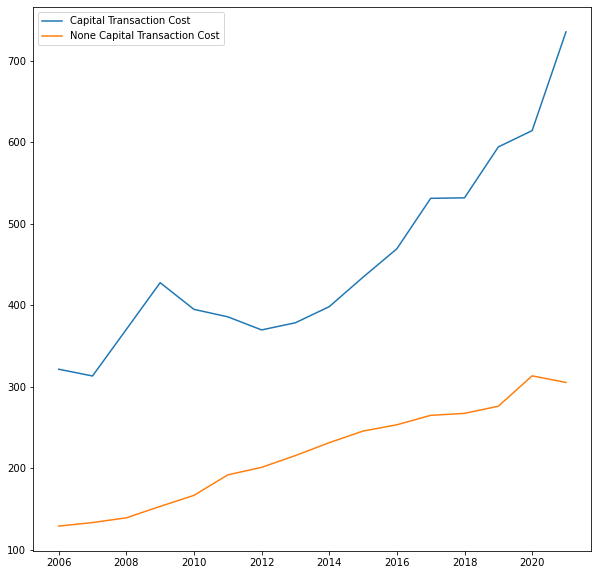

In [11]:
# 부동산 실거래가 시각화

plt.figure(figsize=(10,10))
plt.plot(year, df_capital_transaction_cost, label='Capital Transaction Cost')
plt.plot(year, df_none_capital_transaction_cost, label='None Capital Transaction Cost')
plt.legend()


In [12]:
#회귀분석

df_merge_capital = pd.merge(capital_df, df_capital_transaction_cost, left_index=True, right_index=True)
df_merge_none_capital= pd.merge(none_capital_df, df_none_capital_transaction_cost, left_index=True, right_index=True)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#capital
ex= df_merge_capital['FLP']
ex1= df_merge_capital['Transaction_Cost']


#none capital
ex_n=df_merge_none_capital['FLP']
ex_n1= df_merge_capital['Transaction_Cost']


x=ex.values
x=x.reshape(-1,1)

y=ex1.values
y=y.reshape(-1,1)  


x_n=ex_n.values
x_n=x_n.reshape(-1,1)

y_n=ex_n1.values
y_n=y_n.reshape(-1,1)


lr.fit(x_n, y_n)


LinearRegression()

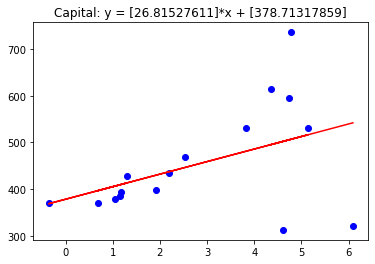

In [18]:
#시각화 수도권

import matplotlib.pyplot as plt

lr.fit(x,y)
y2 = lr.coef_[0]*x +lr.intercept_
plt.scatter(x, y, color='blue')
plt.plot(x, y2, color='red')
plt.title('Capital: y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()



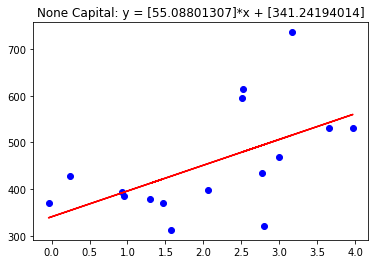

In [14]:
#시각화 비수도권

lr.fit(x_n,y_n)
y2_n=lr.coef_[0]*x_n +lr.intercept_

plt.scatter(x_n, y_n, color='blue')
plt.plot(x_n, y2_n, color='red')
plt.title('None Capital: y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))

plt.show()


In [16]:
# 산점도 찾기

import statsmodels.api as sm
result_capital = sm.OLS(y, sm.add_constant(x)).fit()
result_none_capital = sm.OLS(y_n, sm.add_constant(x_n)).fit()

capital_rsquared=result_capital.rsquared
none_capital_rsquared=result_none_capital.rsquared

capital_f_pvalue=result_capital.f_pvalue
none_capital_f_pvalue=result_none_capital.f_pvalue

print('수도권:','R squared:',round(capital_rsquared,4),'Prob(F-statistics):', round(capital_f_pvalue,4))
print('비수도권:','R squared:',round(none_capital_rsquared,4),'Prob(F-statistics):', round(none_capital_f_pvalue,4))

수도권: R squared: 0.1987 Prob(F-statistics): 0.0836
비수도권: R squared: 0.3102 Prob(F-statistics): 0.025
